In [1]:
#Task 1: Data Preparation
# "You will start by loading the CSV data from the file (using appropriate pandas functions) and checking whether the loaded data is equivalent to the data in the source CSV file.
# Then, you need to clean the data by using the knowledge we taught in the lectures. You need to deal with all the potential issues/errors in the data appropriately (such as: typos, extra whitespaces, sanity checks for impossible values, and missing values etc). "

# Please structure code as follows: 
# always provide one line of comments to explain the purpose of the code, e.g. load the data, checking the equivalent to original data, checking typos (do this for each other types of errors)



####################################################################################
#Importing dataset and verifying data with the csv
####################################################################################

Automob='Automobile.csv'

#Importing the pandas package for better handling of Series and DataFrames
import pandas as pd

#Loading the data from csv into memory
Auto=pd.read_csv(Automob, sep='#', header=None, names=['symboling',
'normalized-losses',
'make',
'fuel-type',
'aspiration',
'num-of-doors',
'body-style',
'drive-wheels',
'engine-location',
'wheel-base',
'length',
'width',
'height',
'curb-weight',
'engine-type',
'num-of-cylinders',
'engine-size',
'fuel-system',
'bore',
'stroke',
'compression-ratio',
'horsepower',
'peak-rpm',
'city-mpg',
'highway-mpg',
'price'])

#Making a copy of dataset
df=Auto.copy()

#Checking if data is same as csv
df.head(2)
df.tail()
df.dtypes
df.columns
df.shape

#importing the numpy for array opearations
import numpy as np

#Checking the number of null values for each attribute in dataset
#df.isna().sum()

###################################################################
# Stage 1 Handling Null values
###################################################################

################################################
#Normalized-losses
################################################
#Dropping the null values for 'num-of-doors' column
df=df.dropna(subset=['num-of-doors'])
#Removing typos for 'num-of-doors' column
df['num-of-doors'].replace('fourR', 'four', inplace=True)
df['num-of-doors'].replace('Four', 'four', inplace=True)
#Removing redundant white space for 'num-of-doors' column
df['num-of-doors']=df['num-of-doors'].str.strip()
df['num-of-doors'].value_counts()

#Checking number of null values in dataset
#df.isna().sum()

#######################################################################
#Handling null values for Normalized-losses where 'num-of-doors' = 'two'
#######################################################################

#Creating a mask with num-of-doors = 'two'
mask_two_door = df['num-of-doors'] == 'two'

#Creating a mask with num-of-doors = 'two' where normalized-losses is null
mask_two_door_null = mask_two_door & (df['normalized-losses'].isnull())

#Creating a temporaray dataframe for num-of-doors = 'two'
tempdf = df.loc[lambda df: df['num-of-doors'] == 'two']

#Importing matplotlib package for plots
import matplotlib.pyplot as plt

# Creating density plot for 'normalized-losses' for num-of-doors = 'two'
tempdf['normalized-losses'].plot(kind='density')
plt.xlabel('normalized-losses')
#plt.show()

#Density plot for normalized-losses of four door cars is a little positively-skewed, so we replace it with the median of observations
tempdf['normalized-losses'].describe()
#Finding median for normalized-losses where num-of-doors = 'two'
x=tempdf['normalized-losses'].median()

#Applying mask for null values where num-of-doors = 'two'
df.loc[mask_two_door_null, 'normalized-losses'] = x

########################################################################
#Handling null values for Normalized-losses where 'num-of-doors' = 'four'
########################################################################
#Creating a mask with num-of-doors = 'four'
mask_four_door = df['num-of-doors'] == 'four'

#Creating a mask with num-of-doors = four where normalized-losses are null
mask_four_door_null = mask_four_door & (df['normalized-losses'].isnull())

#Creating a temporaray dataframe tempdf_four for num-of-doors = 'four'
tempdf_four = df.loc[lambda df: df['num-of-doors'] == 'four']

# Creating density plot for 'normalized-losses' for num-of-doors = 'four'
tempdf_four['normalized-losses'].plot(kind='density')
plt.xlabel('normalized-losses')
#plt.show()

#Density plot for normalized-losses of four door cars is a little positively-skewed, so we replace it with the median of observations
tempdf['normalized-losses'].describe()
#Finding median for normalized-losses where num-of-doors = 'four'
y=tempdf_four['normalized-losses'].median()

#Applying mask for null values where num-of-doors = 'four'
df.loc[mask_four_door_null, 'normalized-losses'] = y


###########################################################################################################
#Handling impossible values for 'symboling' column, Check section on 'Handling impossible values' in report
###########################################################################################################
df.loc[lambda df: df['symboling']==4]
df['make']=df['make'].str.strip()
df['make']=df['make'].str.lower()

df.loc[lambda df: df['price']==16845.0]

#Creating mask for vehicles with 'price'=16845.0
mask_price = df['price'] == 16845.0
#Since all other feature values are same and we have similar records with 'make' = 'volvo' 
#with matching feature values and 25.0 is an impossible value for 'normalized-losses', we replace symboling to -1 and 'normalized-losses to 95.0'
df.loc[mask_price, 'symboling'] = -1
df.loc[mask_price, 'normalized-losses'] = 95.0

#########################################
#'bore'
#########################################
#df.isna().sum()

#'bore' has continuous values from 2.54 to 3.94. 
df['bore'].describe()
#Making a box-plot to get better visualisation of summary-statistics and any available outliers.
df['bore'].plot(kind='box')
#plt.show()

#Density plot for 'bore' to predict the skewedness
df['bore'].plot(kind='density')
#plt.show()

#Analysing tuples with null values for 'bore'
df[df['bore'].isnull()]

#Analysing values of 'bore' for 'compression-ratio' =9.4
df.loc[lambda df: df['compression-ratio']==9.4]

########################################################################
#Handling null values for 'bore' where 'compression-ratio'=9.4
########################################################################

#Creating a new dataset with values corresponding to 'compression-ratio'=9.4
af=df.loc[lambda df: df['compression-ratio']==9.4]

#Creating density plot for skewedness'
af['bore'].plot(kind='density')
#plt.show()

#Getting the summary statistice for 'bore' with 'compression-ratio'=9.4
af['bore'].describe()

#Creating a mask with 'compression-ratio' = 9.4
mask_comp = df['compression-ratio'] == 9.4

#Creating a mask with 'compression-ratio' = 9.4 where 'bore' is null
mask_comp_null = mask_comp & (df['bore'].isnull())

#Replacing null values for 'bore' with the median of 'bore' for 'compression-ratio'= 9.4
df.loc[mask_comp_null, 'bore'] = af['bore'].median()

########################################################################
#'stroke'
########################################################################

#Analysing tuples with null values for 'stroke'
df[df['stroke'].isnull()]

#Analysing values of stroke for 'peak-rpm' = 6000
df.loc[lambda df: df['peak-rpm']==6000.0]

########################################################################
#Handling null values for 'stroke' where 'peak-rpm'=6000
########################################################################

#Creating a new dataset with value corresponding to the 'peak-rpm'=6000
sf=df.loc[lambda df: df['peak-rpm']==6000.0]
sf['stroke'].describe()

#Creating a mask with 'peak-rpm' = 6000.0
mask_peak_rpm = df['peak-rpm'] == 6000.0
#Creating a mask with 'peak-rpm' = 6000.0 where 'stroke' is null
mask_peak_rpm_null = mask_peak_rpm & (df['stroke'].isnull())

#Replacing the null 'stroke' values with mode
df['stroke'].fillna(3.41, inplace=True)

########################################################################
#'horsepower' and 'peak-rpm'
########################################################################
df.loc[lambda df: df['horsepower'].isnull()]
df['stroke'].describe()
df['stroke'].plot(kind='density')
#plt.show()

df.loc[lambda df: df['peak-rpm']==6000.0]

#Analysing summary statistics of dataset with 'peak-rpm' = 6000.0
sf=df.loc[lambda df: df['peak-rpm']==6000.0]
sf['stroke'].describe()

df[df['horsepower'].isnull()]
df[df['peak-rpm'].isnull()]
df['peak-rpm'].describe()

df.loc[lambda df: df['engine-size']==132]

df['horsepower'].plot(kind='density')
plt.show()

df['horsepower'].plot(kind='box')
plt.show()

df['horsepower'].describe()

df['peak-rpm'].plot(kind='density')
plt.show()

df['peak-rpm'].plot(kind='box')
plt.show()

df['peak-rpm'].describe()

################################################################################################
#Handling null values for 'horsepower' and 'peak-rpm' by replacing them with column wise medians
################################################################################################
#Replacing null values for 'horsepower' with median that spans the rows and extends column-wise
df['horsepower'].fillna(df['horsepower'].median(axis=0), inplace=True)
#Replacing null values for 'peak-rpm' with median that spans the rows and extends column-wise
df['peak-rpm'].fillna(df['peak-rpm'].median(axis=0), inplace=True)

####################################
#'price'
####################################

df.loc[lambda df: df['price'].isnull()]

df.loc[lambda df: df['price']==0]

########################################################################################
#Handling impossible value price=0. Check Handling impossible value section of report
########################################################################################

#All 0 price values fall in symboling=-1 and symboling is a measure of price as per description
#Creating a dataframe with 'symboling' = -1
xf=df.loc[lambda df: df['symboling']==-1]

df['fuel-type'].value_counts()
#Removing the redundant white space and typos
df['fuel-type']=df['fuel-type'].str.lower()
df['fuel-type']=df['fuel-type'].str.strip()

#Creating a dataframe from symboling=-1 dataframe where 'fuel-type' = 'diesel'
diesel_fueldf=xf.loc[lambda df: df['fuel-type']=='diesel']
#Creating a dataframe from symboling=-1 dataframe where 'fuel-type' = 'gas'
gas_fueldf=xf.loc[lambda df: df['fuel-type']=='gas']

#Finding summary statistics for dataframe with 'symboling'=-1 and 'fuel-type'='diesel'
diesel_fueldf['price'].plot(kind='box')
#plt.show()
diesel_fueldf['price'].describe()

#Finding summary statistics for dataframe with 'symboling'=-1 and 'fuel-type'='gas'
gas_fueldf['price'].plot(kind='box')
#plt.show()
gas_fueldf['price'].describe()

#Creating a mask for tuples with 'symboling' = -1
mask_sym = df['symboling'] == -1
#Creating a mask for tuples with 'symboling' = -1 and 'fuel-type' = 'diesel'
mask_sym_fuel_diesel= mask_sym & (df['fuel-type'] == 'diesel')
#Creating a mask for tuples with 'symboling' = -1 and 'fuel-type' = 'gas'
mask_sym_fuel_gas= mask_sym & (df['fuel-type'] == 'gas')

#Creating a mask for tuples with 'symboling' = -1 and 'fuel-type' = 'diesel' and 'price' = 0
mask_sym_fuel_diesel_price = mask_sym_fuel_diesel & (df['price'] == 0)
#Creating a mask for tuples with 'symboling' = -1 and 'fuel-type' = 'gas' and 'price' = 0
mask_sym_fuel_gas_price = mask_sym_fuel_gas & (df['price'] == 0)

#Replacing the price = 0 values where symboling =-1 and fuel-type='diesel'
df.loc[mask_sym_fuel_diesel_price, 'price'] = diesel_fueldf['price'].median()
#Replacing the price = 0 values where symboling =-1 and fuel-type='gas'
df.loc[mask_sym_fuel_gas_price, 'price'] = gas_fueldf['price'].median()


############################################################################################################

diesel_fueldf['price'].describe()
diesel_fueldf['price'].plot(kind='density')
#plt.show()

df.loc[lambda df: df['price'].isnull()]

df['price'].plot(kind='density')
#plt.show()

df.loc[lambda df: df['symboling']==0]

##############################################################################################################################
#Handling null values for price by replacing them with the median of price values corresponding to symboling=0 and symboling=1
##############################################################################################################################

#Creating dataset with 'symboling'=0
jf0=df.loc[lambda df: df['symboling']==0]
jf0['price'].plot(kind='box')
#plt.show()

#Creating dataset with 'symboling'=1
jf1=df.loc[lambda df: df['symboling']==1]
jf1['price'].plot(kind='box')
#plt.show()

#Checking skewedness of price for symboling =0 and symboling = 1 respectively.
jf0['price'].describe()
jf1['price'].describe()

#Creating separate masks for 'symboling'=0 and 'symboling'=1
mask_sym0_price = df['symboling'] == 0
mask_sym1_price = df['symboling'] == 1

##Creating separate masks for 'symboling'=0 when 'price' is null and 'symboling'=1 when 'price' is null
mask_sym0_price_nan = mask_sym0_price & (df['price'].isnull())
mask_sym1_price_nan = mask_sym1_price & (df['price'].isnull())

#Replacing the null values with median values of 'price' corresponding to 'symboling'=0 and 'symboling'=1 respectively
df.loc[mask_sym0_price_nan, 'price'] = jf0['price'].median()
df.loc[mask_sym1_price_nan, 'price'] = jf1['price'].median()


########################################################################################################

jf0['price'].plot(kind='density')
#plt.show()

jf1['price'].plot(kind='density')
#plt.show()

#########################################################################################################
#Handling Upper case letters and redundant white space for object columns after removing all null values
##########################################################################################################
#Converting all object column values to lower case
df = df.apply(lambda x: x.str.lower() if(x.dtype == 'object') else x)
#Removing all the redundant white space from the object columns
df = df.apply(lambda x: x.str.strip() if(x.dtype == 'object') else x)

###########################################################################################################
#Removing any remaining typos and verifying the correctness of values in the dataset
###########################################################################################################
df.columns
df.dtypes
df['symboling'].value_counts()

df['make'].value_counts()

df['drive-wheels'].value_counts()

#Replacing the typo with correct value
df['make'].replace('vol00112ov', 'volvo', inplace=True)
#Replacing the typo with correct value
df['aspiration'].replace('turrrrbo', 'turbo', inplace=True)
#Replacing the typo with correct value
df['drive-wheels'].replace('4wd', 'fwd', inplace=True)

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

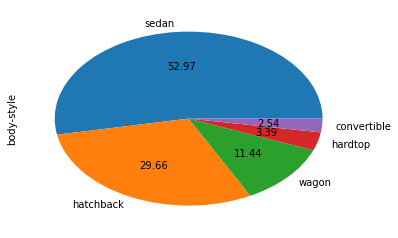

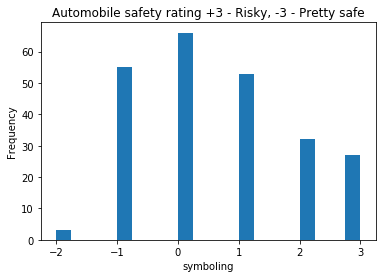

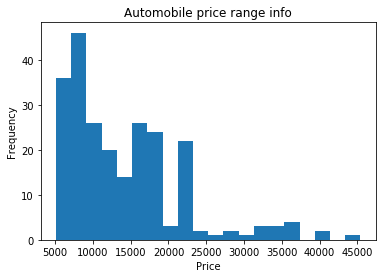

In [2]:
# Task 2: Data Exploration
# 1. Choose 1 column with nominal values, 1 column with ordinal Values, and 1 column with numerical values

#Code goes after this line
###########################################################################

#A pie chart for the body-style depicting the preferred 'body-style' among consumers
df['body-style'].value_counts().plot(kind='pie', autopct='%.2f')
plt.show()
###########################################################################

#Creating a histogram depicting the safety rating of vehicles
df['symboling'].plot(kind='hist',bins=20)
plt.title('Automobile safety rating +3 - Risky, -3 - Pretty safe')
plt.xlabel('symboling')
plt.show()

###########################################################################

#A histogram for price distribution tells how much price to pay for a car.
df['price'].plot(kind='hist',bins=20)
plt.title('Automobile price range info')
plt.xlabel('Price')
plt.show()

############################################################################



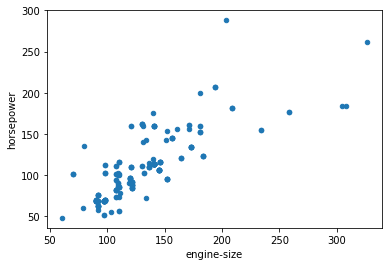

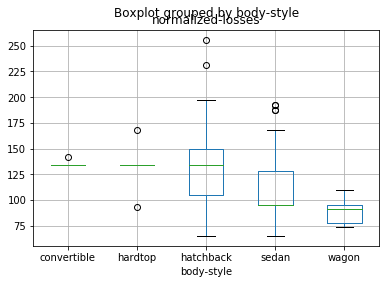

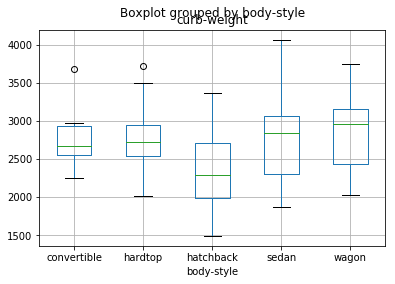

In [3]:
# Task 2: Data Exploration
# 2. Explore the relationships between columns; at least 3 visualisations with plausible hypothesis

#Code goes after this line
#########################################################################

#Scatter plot depicting the trend in horsepower (feature 16) with increase in the engine-size (feature 21)
df.plot(kind='scatter', x=16, y=21)
plt.show()

#########################################################################

#Box plot to prove the hypothesis that whether the normalized-losses are lesser for family driven vehicles such as sedans and wagons.
df.boxplot(column='normalized-losses',by='body-style')
plt.show()

#########################################################################

#A boxplot depicting the relation between curb-weight and body-style to provide evidence that 'curb-weight' depends on the 'body-style' of the vehicle
df.boxplot(column='curb-weight',by='body-style')
plt.show()


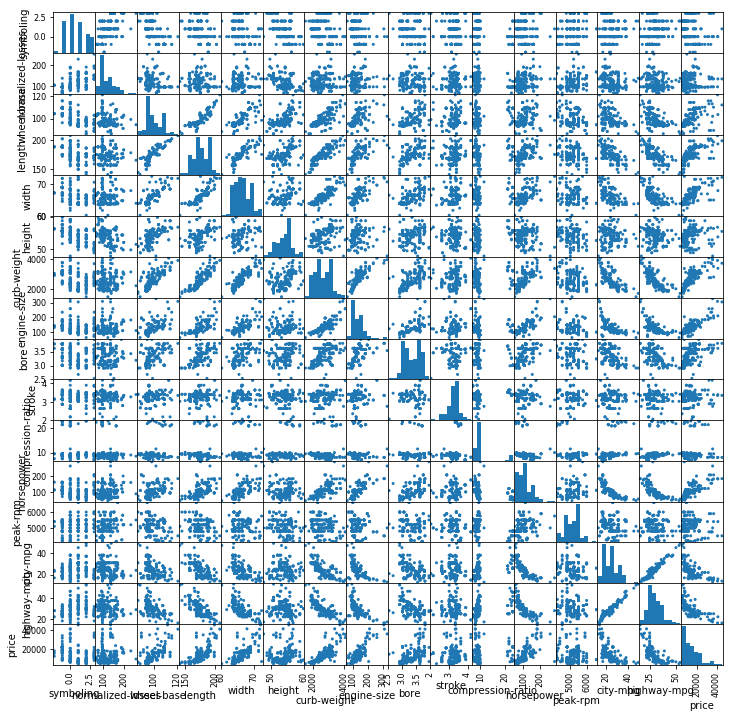

In [5]:
# Task 2: Data Exploration
# 3. Scatter matrix for all numerical columns

#Code goes after this line

###########################################################################

numericdf=df.select_dtypes(exclude=['object'])
from pandas.plotting import scatter_matrix
scatter_matrix(numericdf,alpha=1.0,figsize=(12,12),diagonal='hist')
plt.show()